## K-means
http://nbviewer.jupyter.org/github/flothesof/posts/blob/master/20150717_Kmeans.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# vstack(): Stack arrays in sequence vertically (row wise).
# Take a sequence of arrays and stack them vertically to make a single array. 
points = np.vstack([np.random.randn(150, 2) * 0.75 + np.array([1, 0]),
                    np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5]),
                    np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5])])
print(points)

[[  6.16876431e-01  -5.28329280e-01]
 [ -4.25039513e-01   1.01676183e+00]
 [  1.87090217e+00   4.25381789e-01]
 [  1.14712974e+00   3.06543939e-01]
 [  2.11075466e+00  -4.56846274e-01]
 [  5.40446674e-01  -1.73170930e-01]
 [  1.07553297e+00  -4.37958425e-01]
 [  2.55778906e+00  -9.10332072e-01]
 [  1.58560325e-01  -8.14545343e-02]
 [  1.45581722e+00   1.10869523e+00]
 [  6.96689824e-01  -3.24134482e-01]
 [  5.60604078e-01  -2.44281366e-01]
 [  1.84079183e+00   5.15908670e-01]
 [  4.62944066e-01  -7.77383961e-01]
 [ -8.77740009e-01  -1.31652599e-01]
 [  1.56594095e+00  -5.18017374e-01]
 [  7.77441422e-01  -9.87140860e-01]
 [ -3.46197725e-01  -9.60140367e-01]
 [  2.11161995e+00   5.30450388e-01]
 [  1.55624544e+00   6.99795701e-01]
 [  8.60974030e-02  -1.33892841e-01]
 [  1.05906669e+00  -5.62457760e-01]
 [  1.73700582e+00  -8.13998409e-01]
 [  1.79467248e+00   3.18517733e-01]
 [  3.78360564e-02  -1.96500555e-01]
 [  2.98569627e-02  -2.81776227e-01]
 [  8.34412505e-01  -1.81165944e-01]
 

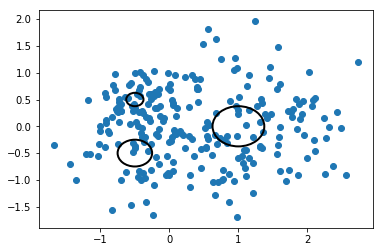

In [3]:
# Plot random generated data
# scatter(x, y)
plt.scatter(points[:, 0], points[:, 1])

# plot hidden centers
ax = plt.gca() # The function gca() returns the current axes.
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=2))
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=2))
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=2))

In [4]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [5]:
# Try it out
initialize_centroids(points, 3)

array([[-0.03030062, -0.55877568],
       [-0.34080564, -1.40491779],
       [ 0.01243209,  0.78065291]])

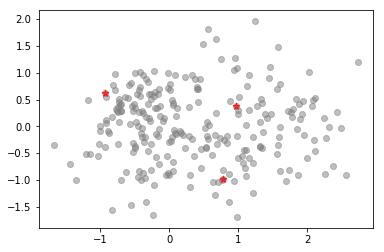

In [6]:
plt.scatter(points[:, 0], points[:, 1], c='grey', alpha=0.5)
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50, marker='*', alpha=0.7)

# https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter

In [7]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2)) # broadcast
    return np.argmin(distances, axis=0) # Returns the indices of the minimum values along an axis.

In [8]:
# broadcast
print(points.shape)
print(centroids[:, np.newaxis].shape)
print((points - centroids[:, np.newaxis]).shape)
print(points - centroids[:, np.newaxis])

(250, 2)
(3, 1, 2)
(3, 250, 2)
[[[ 1.55387124 -1.1441598 ]
  [ 0.5119553   0.40093131]
  [ 2.80789698 -0.19044873]
  ..., 
  [ 0.49295461 -1.44297987]
  [ 0.71742945 -1.71111266]
  [ 0.41653693 -1.09518331]]

 [[-0.16056499  0.45881158]
  [-1.20248094  2.00390269]
  [ 1.09346075  1.41252265]
  ..., 
  [-1.22148162  0.15999151]
  [-0.99700678 -0.10814128]
  [-1.2978993   0.50778807]]

 [[-0.34207169 -0.91068752]
  [-1.38398763  0.63440359]
  [ 0.91195405  0.04302355]
  ..., 
  [-1.40298832 -1.20950758]
  [-1.17851348 -1.47764038]
  [-1.479406   -0.86171103]]]


In [9]:
# Try
c = initialize_centroids(points, 3)
cc = closest_centroid(points, c)
print(c)
print(cc)

[[-0.63775243  0.53883304]
 [ 0.76956812 -0.81349916]
 [ 0.66747695 -0.16993392]]
[1 0 2 2 1 2 1 1 2 2 2 2 2 1 0 1 1 1 2 2 2 1 1 2 2 2 2 1 2 2 2 2 0 2 0 1 1
 2 2 1 2 2 2 1 1 2 2 2 0 1 0 2 1 0 2 2 2 0 0 2 2 2 1 2 1 2 0 2 2 1 1 2 2 1
 2 1 2 1 2 0 0 2 2 2 0 2 0 1 2 2 0 1 2 1 0 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 2 2 0 2 1 2 0 0 0 1 2 1 2 0 1 1 2 0 2 1 1 2 2 1 1 2 2
 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 2 2 1 0 1 0 0 0 1 0 0
 0 1 1 2 1 0 0 0 0 1 2 0 0 0 0 2 1 0 2 0 0 0 0 1 1 1 1 0]


In [10]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [11]:
new_centroids = move_centroids(points, closest_centroid(points, centroids), centroids)
print(new_centroids)

[[-0.54923788  0.25319719]
 [ 0.57803828 -0.79254841]
 [ 1.10900702  0.38593318]]


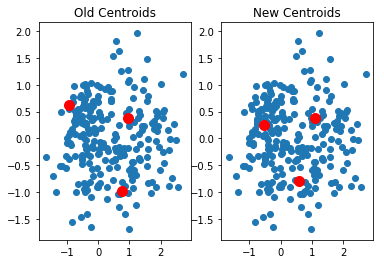

In [12]:
ax = plt.subplot(121)
ax.set_title("Old Centroids")
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

ax = plt.subplot(122)
ax.set_title("New Centroids")
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='r', s=100)

### Iteration

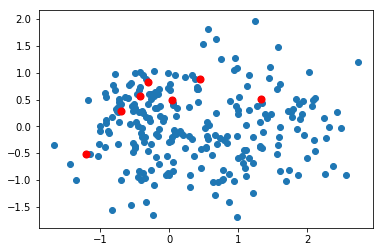

In [13]:
# init
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)

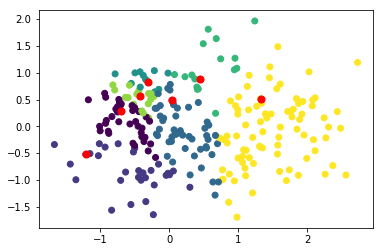

In [14]:
closest = closest_centroid(points, centroids)
plt.scatter(points[:, 0], points[:, 1], c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)

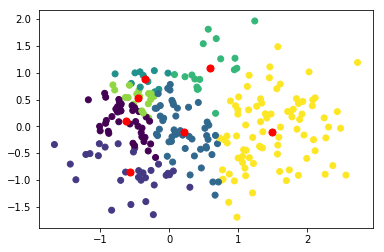

In [15]:
# run this block multiple times to get 'better' centroids

centroids = move_centroids(points, closest, centroids)
plt.scatter(points[:, 0], points[:, 1], c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)

### Animation

In [16]:
import ipywidgets

In [17]:
# init
centroids = initialize_centroids(points, 7)

In [18]:
# iter
def f(x):
    global points, centroids, closest
    
    if x % 2 == 0:
        closest = closest_centroid(points, centroids)
        plt.scatter(points[:, 0], points[:, 1], c=closest)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)
        plt.show()
    else:
        centroids = move_centroids(points, closest, centroids)
        plt.scatter(points[:, 0], points[:, 1], c=closest)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)
        plt.show()

In [19]:
# http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html

ipywidgets.interact(f, x = ipywidgets.FloatSlider(min = 0.0, max = 30.0, step = 1.0, value = 0.0))

<function __main__.f>